In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carreras

Catálogo de carreras:
* Datos del gran premio de Mónaco $\rightarrow$ `circuitId: 6`
* De 1970 en adelante

In [2]:
pd.read_csv('data/races.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1125 non-null   int64 
 1   year         1125 non-null   int64 
 2   round        1125 non-null   int64 
 3   circuitId    1125 non-null   int64 
 4   name         1125 non-null   object
 5   date         1125 non-null   object
 6   time         1125 non-null   object
 7   url          1125 non-null   object
 8   fp1_date     1125 non-null   object
 9   fp1_time     1125 non-null   object
 10  fp2_date     1125 non-null   object
 11  fp2_time     1125 non-null   object
 12  fp3_date     1125 non-null   object
 13  fp3_time     1125 non-null   object
 14  quali_date   1125 non-null   object
 15  quali_time   1125 non-null   object
 16  sprint_date  1125 non-null   object
 17  sprint_time  1125 non-null   object
dtypes: int64(4), object(14)
memory usage: 158.3+ KB


In [3]:
races = (
    pd.read_csv(
        'data/races.csv',
        usecols=['raceId','year','circuitId','name']
    )
    .query('year >= 1970')
    .query('circuitId == 6')
    .sort_values(by='year')
    .set_index('raceId')
)

races.head()

,year,circuitId,name
raceId,,,
645,1970,6,Monaco Grand Prix
634,1971,6,Monaco Grand Prix
623,1972,6,Monaco Grand Prix
610,1973,6,Monaco Grand Prix
595,1974,6,Monaco Grand Prix


# Tiempos de clasificación
* La evolución del tiempo de clasificación de Pole Position

In [5]:
pd.read_csv('data/qualifying.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10254 entries, 0 to 10253
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      10254 non-null  int64 
 1   raceId         10254 non-null  int64 
 2   driverId       10254 non-null  int64 
 3   constructorId  10254 non-null  int64 
 4   number         10254 non-null  int64 
 5   position       10254 non-null  int64 
 6   q1             10254 non-null  object
 7   q2             10241 non-null  object
 8   q3             10227 non-null  object
dtypes: int64(6), object(3)
memory usage: 721.1+ KB


In [6]:
vdf = (
    pd.read_csv(
        'data/qualifying.csv',
        usecols=['raceId','position','q3'])
    .set_index('raceId')
    .query('position == 1')
    .replace('\\N', None)
    .dropna()
    .join(
        other=races.filter(items=['year']),
        how='inner'
    )
    .assign(
        minutes = lambda df: df.q3.apply(lambda row: int(row.split(':')[0])),
        seconds = lambda df: df.q3.apply(lambda row: float(row.split(':')[-1])),
        time_s = lambda df: 60 * df.minutes + df.seconds
    )
)
vdf.head()

,position,q3,year,minutes,seconds,time_s
raceId,,,,,,
23,1,1:15.787,2008,1,15.787,75.787
40,1,1:15.726,2007,1,15.726,75.726
59,1,1:13.962,2006,1,13.962,73.962
6,1,1:14.902,2009,1,14.902,74.902
342,1,1:13.826,2010,1,13.826,73.826


# Line plot

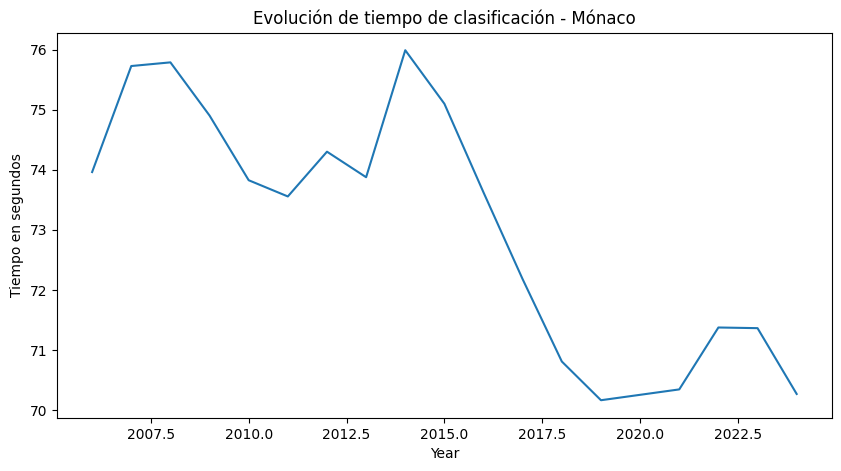

In [24]:
# Datos de visualización
vdf = vdf.sort_values(by='year')

# Especificaciones de figura
fig, ax = plt.subplots(figsize=(10,5))

# Elementos de visualización
ax.plot(
    vdf.year,
    vdf.time_s
)

# Anotaciones y estilo
ax.set_title('Evolución de tiempo de clasificación - Mónaco')
ax.set_xlabel('Year')
ax.set_ylabel('Tiempo en segundos')
fig.savefig('images/line_plot.jpg')

plt.show()